# ASTR 21100 

# "Computational Techniques in Astrophysics"

## Instructor: Andrey Kravtsov

### office: ERC 415; email: kravtsov@uchicago.edu
### office hours: Tue, 10:30am-noon (unless noted otherwise)

#### Teaching Assistants: 
#### Dimitrios Tanoglidis (dtanoglidis@uchicago.edu)
#### Georgios Zakharegkas (gzakharegkas@uchicago.edu)

In [5]:
import numpy as np 

# use jupyter "magic" command to tell it to embed plot into the notebook 
import matplotlib.pyplot as plt
%matplotlib inline
# reusing my codes from the repository
from codes.plot_utils import plot_pretty
plot_pretty(dpi=150, fontsize=12)

In [6]:
plot_pretty(dpi=150, fontsize=12)

### Sampling higher dimensional distributions

What about drawing samples from higher dimensional distributions? Can we still use inverse transform and rejection sampling?


It depends on how well we know the distribution we are sampling from and what it is. If we are sampling from say $p(x,y)$ where $y$ does not depend on $x$, i.e., $p(x,y)=p_x(x)p_y(y)$, we can simply sample $x$ and $y$ independently using inverse transform method with their respective cdfs: 

$$
F_x(x) = \int\limits_{-\infty}^x p_x(x^\prime)dx^\prime\int\limits_{-\infty}^{\infty} p_y(y)dy=\int\limits_{-\infty}^x p_x(x^\prime)dx^\prime,
$$

$$
F_y(y) = \int\limits_{-\infty}^y p(y^\prime)dy^\prime\int\limits_{-\infty}^{\infty} p_x(x)dx=\int\limits_{-\infty}^y p(y^\prime)dy^\prime.
$$
 
or with the rejection method.


If instead $x$ and $y$ do depend on each other, by rules of probability: 

$$
p(x,y) = p(x|y) p_y(y)=p(y|x) p_x(x),
$$

where

$$p_x(x)=\int\limits_{\infty}^\infty p(x,y)dy;\ \ \ p_y(y)=\int\limits_{\infty}^\infty p(x,y)dx;$$

and thus samples of $x$ have to be drawn in a way dependent on samples of $y$ to respect these rules. For example, we can draw a sample $x_i$ from $p_x(x)$, then draw $y$ from $p(y|x_i) p_x(x_i)$ if the functional form of $p(y|x_i) p_x(x_i)$ is known and allows easy application of the inverse transform or rejection method. 

In 2 and 3 dimensions, in principle, even for distributions that may be non-trivial to integrate for cdf, these can be approximated by 2d or 3d splines or Chebyshev polynomials (see, e.g., <a href="https://arxiv.org/abs/1307.1223">Olver & Townsend 2013</a>). So there is no reason why inverse transform cannot be used in 2D or 3D, except that complexity and computational expense of computations increase. 

At some point, these methods become impractical due to the so-called *curse of dimensionality* (complexity and memory requirements increasing exponentially with growing number of dimensions). 

### A generic way to sample multi-dimensional distributions: Markov Chain Monte Carlo (MCMC) 

In a seminal 1953 paper <a href="http://adsabs.harvard.edu/abs/1953JChPh..21.1087M">"*Equation of State Calculations by Fast Computing Machines*"</a>, by Nicholas Metropolis, Arianna Rosenbluth, Marshall Rosenbluth, Augusta Teller, and Edward Teller, used a novel method to produce samples in a Monte Carlo model of a
system of interacting particles approaching thermodynamic equilibrium. 

Despite the highly specific application of the original paper, the approach they used is generic and can be used to sample 
pdfs in any number of dimensions, even when normalization of the pdf is not known and cannot be easily computed.
This approach, developed and formalized further in the subsequent decades (particularly by W.K. Hastings in 1970) is now widely known as the MCMC. 

The MCMC algorithm is included in the <a href="https://www.computer.org/csdl/mags/cs/2000/01/c1022.html">top ten algorithms of the 20th century.</a> (under the name "Metropolis Algorithm for Monte Carlo"). 

<img width=200 src="img/nicholas_metropolis_maniac_board.jpg"></img>

<center>Nick Metropolis (UChicago, BSc 1937, PhD 1941)</center>

### What's in the name? 

"*Monte Carlo*" is in the name because it involves *random samples generated in a sequence of steps according to a set rules.*  "*Markov Chain*" is in the name because sampling algorithm during a step explicitly depends only on the samples from the previous step, which makes the produced sequence of samples a so-called *Markov random process.*

### Logic of the MCMC sampling

Suppose we sample a $d$-dimensional pdf, $\pi(\vec{x})$, i.e. we are producing a sequence of vectors $\vec{x}_i$ with $d$ elements that are drawn from $\pi(\vec{x})$. 

Let's think of the vector of sample values produced during successive steps of the algorithm as $d$ physical properties of particles in an *equilibrium* thermodynamic system sampling its thermodynamic properties and different parts of the corresponding distributions. 

In an equilibrium system, the flux of particles from one point $\vec{x}_i$ of the $d$-dimensional parameter space to another point $\vec{x}_{i+1}$ should be balanced by the flux of particles from $\vec{x}_{i+1}$ to $\vec{x}_i$, lest distribution of particles in the parameter space evolve, which is inconsistent with the equilibrium assumption. 
  
The number density of pdf samples at a given $\vec{x}$ is equal to $\pi(\vec{x})$ by definition. Thus, the flux balance  can be achieved in the MCMC if we draw successive samples in such a way that transition probabilities from $x_i$ to $x_{i+1}$ and from $x_{i+1}$ to $x_i$ satisfy:

$$\pi(\vec{x}_i)\,p_{\rm trans}(\vec{x}_{i+1}\vert\vec{x}_i)=\pi(\vec{x}_{i+1})\,p_{\rm trans}(\vec{x}_{i}\vert\vec{x}_{i+1}).$$ 

This is called *the detailed balance condition.* 

### 2-stages of the MCMC steps: step proposal and step acceptance/rejection

In the MCMC methods, a sample $\vec{x}_{i+1}$ is obtained by considering a trial step from $\vec{x}_{i}$ to a new location $\vec{x}_{\rm try}$ with a proposal step pdf, $p_{\rm try}(\vec{x}_{\rm try}\vert \vec{x}_i)$, which is then accepted as the new location $\vec{x}_{i+1}$ with an *acceptance probability*, $p_{\rm acc}(\vec{x}_{\rm try}\vert \vec{x}_i)$, so that transition probability is 

$$p_{\rm trans}(\vec{x}_{i+1}\vert \vec{x}_i)=p_{\rm try}(\vec{x}_{\rm try}\vert \vec{x}_i)\,p_{\rm acc}(\vec{x}_{\rm try}\vert \vec{x}_i).$$ 

Then detailed balance condition is ensured if:

$$\pi(\vec{x}_i)\,p_{\rm try}(\vec{x}_{i+1}\vert \vec{x}_i)\,p_{\rm acc}(\vec{x}_{i+1}\vert \vec{x}_i) = 
\pi(\vec{x}_{i+1}) \,p_{\rm try}(\vec{x}_{i}\vert \vec{x}_{i+1})\,p_{\rm acc}(\vec{x}_{i}\vert \vec{x}_{i+1})$$

Suppose we choose, $p_{\rm try}$, to be whatever we deem to be convenient and/or efficient (i.e. independent of the target pdf, $\pi$) and such that  it is symmetric with respect to the start and end positions of the step: 

$$p_{\rm try}(\vec{x}^\prime\vert \vec{x})=p_{\rm try}(\vec{x}\vert \vec{x}^\prime).$$ 

This then constraints what we can choose for  $p_{\rm acc}$. 

### Step acceptance probability distribution function

The detailed balance condition:

$$\pi(\vec{x})\,p_{\rm try}(\vec{x}^\prime\vert \vec{x})\,p_{\rm acc}(\vec{x}^\prime\vert \vec{x})=\pi(\vec{x}^\prime)\,p_{\rm try}(\vec{x}\vert \vec{x}^\prime)\,p_{\rm acc}(\vec{x}\vert \vec{x}^\prime).$$

tells us that 
$$p_{\rm acc}(\vec{x}^\prime\vert \vec{x})= \frac{\pi(\vec{x}^\prime)}{\pi(\vec{x})}\,p_{\rm acc}(\vec{x}\vert \vec{x}^\prime).\ \ \ \ \ \ \ \ (\star)$$

Let's assume that $p_{\rm acc}(\vec{x}\vert \vec{x}^\prime)=1$ if $\pi(\vec{x}^\prime)/\pi(\vec{x}) \geq 1$, i.e., *when the proposed step is in the direction of increased pdf amplitude it is always accepted.*

When the proposed step in the direction of decreased $\pi$, $\pi(\vec{x}^\prime)/\pi(\vec{x}) < 1$, accept the step with probability $p_{\rm acc}(\vec{x}\vert \vec{x}^\prime)=\pi(\vec{x}^\prime)/\pi(\vec{x})$. 

Then, it's easily checked that the condition $(\star)$ is satisfied. 

### Acceptance probability "unpacked"

What this means is that we on average should accept a fraction of 
$$
p_{\rm acc}(\vec{x}^\prime\vert\vec{x})=\min\left[\frac{\pi(\vec{x}^\prime)}{\pi(\vec{x})},1.0\right].
$$
 of proposed steps, and reject the rest.
 
***Rejection of a step means that the next sample in the sequence is simply a duplicate of $\vec{x}$***: $\vec{x}^\prime =\vec{x}$. 

### MCMC algorithm

Given a sample $\vec{x}_i$ drawn from $\pi(\vec{x})$ we generate a next sample drawn from the same pdf using the following steps:

1. propose a new trial sample $\vec{x}^\prime$ by drawing it from whatever pdf $p_{\rm try}(\vec{x}^\prime\vert \vec{x}_i)$ we deem convenient, as long as $p_{\rm try}(\vec{x}^\prime\vert \vec{x}_i)=p_{\rm try}(\vec{x}_i\vert \vec{x}^\prime)$.

2. if $\pi(\vec{x}^\prime)/\pi(\vec{x}) \geq 1$, accept the proposed sample: $\vec{x}_{i+1}=\vec{x}^\prime$. 

   else, if $\eta=\pi(\vec{x}^\prime)/\pi(\vec{x}) < 1$, draw a random number, $u$, uniformly distributed in $[0,1)$ and assign the next sample in the sequence as
   
    $$\vec{x}_{i+1}=
 \begin{cases}
            \vec{x}^\prime, &  \mathrm{if}\ \ \ u<\eta,\\
            \vec{x}_i, &    \mathrm{otherwise\ },
    \end{cases}
$$

3. Check whether stopping criteria for generating a sequence are satisfied (more on these later). If not, go to step 1.

### Note: a convenient property of the MCMC algorithm

Acceptance probability for a step depends only on the ratio $\pi(\vec{x}^\prime)/\pi(\vec{x})$. Thus, any normalization constant for $\pi$ cancels and we can apply this algorithm even if we don't know the normalization constant, i.e., we are working with unnormalized distribution $\tilde{\pi}(\vec{x})$.

### Note 2: a slight of hand? 

There is one important conceptual and thorny issue in this method. 

If you paid very close attention, you may have noticed that a trick of sorts was performed: we derived rules to draw a sample $\vec{x}^\prime$ from the target pdf $\pi$ assuming that we have a sample $\vec{x}$ drawn from $\pi$. If we work our way back we have to start with initial sample drawn from $\pi$. How do we draw *that* sample? 

The answer is that we select any sample we want and declare it to be a sample of $\pi$ *by fiat.*

### Note 3: the utter simplicity of the MCMC algorithm

It is evident from the description that as an algorithm (although perhaps not in its foundation) MCMC is utterly simple.


Metropolis algorithm is simple enough to be <a href="https://twitter.com/hashtag/shortestmcmc?src=hash">tweeted</a>:

In [1]:
import numpy as n
r=n.random;f=lambda p:-n.sum(p*p)/2;x=0
for d in r.randn(5000):x=x+d if f(x+d)-f(x)>n.log(r.rand()) else x

A bit less concise, but more readable version in the form of a routine. The routine is set up so that we can use it to sample various distributions defined by a routine <tt>modelpdf</tt>. These can have parameters that are passed via <tt>args</tt> pointer.

Examine the implementation of the Metropolis MCMC in the routine closely. There is a conceptual bug that it's introduced in the routine on purpose, which results in incorrect sampling. The previously existing flaw in this routine has now been fixed.

In [28]:
import numpy.random as rnd

def simple_mcmc(n, x0, step, modelpdf, *args):
    """
    a simple single chain 1d MCMC Metropolis-Hastings sampler
    with step proposal distribution of U(-step,step)
    
    Parameters:
    ------------
    n - integer
        number of MCMC steps (iterations) to take
    x0 - float
        initial x value
    step - float
        step size controlling step proposal distribution
    modelpdf - python function object
        ln(pdf) where pdf is the target pdf to sample
    args - pointer to a list
        list of arguments to pass modelpdf
        
    Returns:
    ---------
    xchain - a numpy vector of size [nsteps]
        list of x values in the MCMC chains
    pacc   - float
        acceptance ratio of the MCMC steps (ratio of accepted to the total proposed number of steps)
    """

    x = x0
    nparams = np.size(x0)
    xchain = np.empty(0)
    xchain = np.append(xchain, x)

    nsample = 0; i = 0
    naccept = 0

    while nsample < n:
        delta = rnd.uniform(-step, step ,nparams)
        xtry = x + delta # trial step
        gxtry = modelpdf(xtry, *args); gx = modelpdf(x, *args)
        if gxtry > gx: 
            x = xtry
            xchain = np.append(xchain,xtry)
            naccept +=1
        else:     
            aprob = gxtry - gx # ln of acceptance probability
            u = rnd.uniform(0.,1.)
            if u < np.exp(aprob):
                x = xtry
                xchain = np.append(xchain,xtry)
                naccept += 1
            
        nsample += 1
        
    return xchain, 1.*naccept/nsample

### Multivariate (multi-dimensional) Gaussian distribution

A $d$-dimensional Gaussian distribution is <a href="https://en.wikipedia.org/wiki/Multivariate_normal_distribution">defined as</a> 

$$p_{\rm G}(x_1,\ldots,x_d) =\frac{1}{\sqrt{(2\pi)^k\vert\Sigma\vert}}\,\exp\left[-\frac{1}{2}(\vec{x}-\vec{\mu})^T\mathbf{\Sigma}^{-1}(\vec{x}-\vec{\mu})\right],$$

where $\vec{\mu}$ is a vector of mean values in  $\Sigma$ is covariance matrix ($\vert\Sigma\vert$ is its determinant). 

We will work with  $\ln$ of this distribution:
$$\ln p_{\rm G}(x_1,\ldots,x_d) = -\frac{1}{2}(\vec{x}-\vec{\mu})^T\mathbf{\Sigma}^{-1}(\vec{x}-\vec{\mu}) -\frac{k}{2}\ln 2\pi - \frac{1}{2}\ln\vert\Sigma\vert.$$

The last two normalization terms can be dropped in the MCMC sampling because they don't depend on $\vec{x}$.  

We will start by sampling a 1d Gaussian to have an easy way to visualize and illustrate the main aspects and issues of the MCMC method. We will then consider sampling some 2d distributions with a routine and <tt>emcee</tt> package that can work in any number of dimensions. 

In [29]:
def gauss_nd(x, means, icov):
    """
    ln of N-dimensional unnormalized Gaussian pdf
    
    Parameters:
    -----------
    x - real 1d numpy vector of size ndim
        position of a sample in ndim-dimensional space
    means - real 1d numpy vector of size ndim
        mean values of the Gaussian in each coordinate
    icov - real numpy array of size [ndim x ndim]
        inverse covariance matrix of the Gaussian
        
    Returns:
    --------
    
    a real number 
        ln(Gaussian)
    """
    diff = x - means
    lpf = - 0.5*np.dot(diff , np.dot( icov , diff ) ) 
    
    return lpf

In [30]:
# the length of chain to produce
nsteps = 100000

# mean and 1/rms of 1d Gaussian
args = [0., 1.]
# starting position of this chain
# x0=10 is not a probable location for a Gaussian with zero mean and unit variance
# this is chosen for illustration how quickly MCMC "recovers" from such an unlikely start
x0 = 10.

# run MCMC with a specified step size
step = 1.
xchain1, pacc1 = simple_mcmc(nsteps, x0, step, gauss_nd, *args)
print("Finished MCMC chain with %d samples for s = %.2f; acceptance probability is %.3e"%(nsteps, step, pacc1))

Finished MCMC chain with 100000 samples for s = 1.00; acceptance probability is 8.044e-01


In [31]:
def plot_1d_pdf_mcmc(xchain, *args, iterlim=100, xlims=[-5.,5.], ylims=[1.e-3,1.], 
                     modelpdf=None, pacc=None, step=None, nbins=200,  lw=1, filename=None):
    """
    plot 1d distribution of a chain produced by MCMC along with its trace
    
    """
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))

    ax[0].set_xlim(xlims); ax[0].set_ylim(ylims)
    ax[0].set_xlabel(r'$x$'); ax[0].set_ylabel(r'$p(x)$')
    ax[0].set_yscale('log')
    hist, bins, patches = ax[0].hist(xchain, density=True,
                                     bins=nbins, color='slateblue',
                                     label=r'$p_{\rm acc}=%.2f;\ s=%.1f$'%(pacc,step))
    binc = 0.5*(bins[1:] + bins[:-1]) # compute bin centers
    y = np.zeros_like(binc)
    for i, bincd in enumerate(binc):
        y[i] = modelpdf(bincd, *args)
        
    #normalize Gaussian pdf properly
    y -= 0.5*(np.log(2.*np.pi) + np.log(1./args[1]))
    
    y = np.exp(y)
    ax[0].plot(binc, y, lw=lw, color='r')
    ax[0].legend(fontsize=7, loc='upper right', frameon=False)
    ax[1].yaxis.set_label_position('right')
    ax[1].set_xlabel(r'$\rm MCMC\ step$'); ax[1].set_ylabel(r'$x$')
    ax[1].set_xlim(0., iterlim); #ax[0].set_ylim(-2.2,2.2)
    ax[1].plot(xchain, lw=0.5)
    if filename is not None:
        plt.savefig('fig/'+filename, bbox_inches='tight')
    plt.show()
    

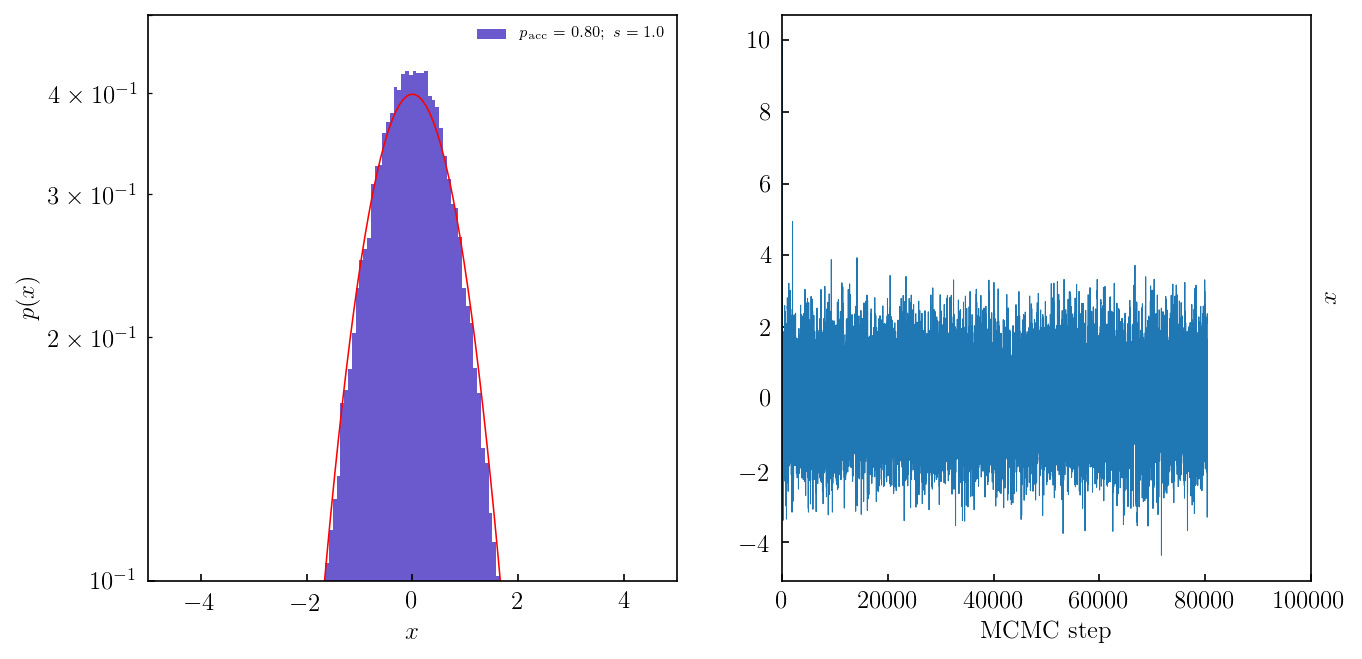

In [32]:
plot_1d_pdf_mcmc(xchain1, *args, modelpdf=gauss_nd, iterlim=100000, ylims=[1.e-1,0.5],  pacc=pacc1, step=step, lw=0.75)

The left plot compares the distribution of MCMC samples (histogram) to the target Gaussian pdf (red line). The right plot shows values of sample $x$ as a function of MCMC step (i.e. order of the sample in the MCMC sequence). The right plot is called *"trace"* in the MCMC jargon. 

### Stepping and MCMC performance

Performance of the Metropolis MCMC, as manifested by the acceptance ratio of the proposed steps, depends sensitively on the distribution we sample and on the stepping algorithm we adopt.

Finished MCMC chain with 100000 samples for s = 0.10; acceptance probability is 9.803e-01


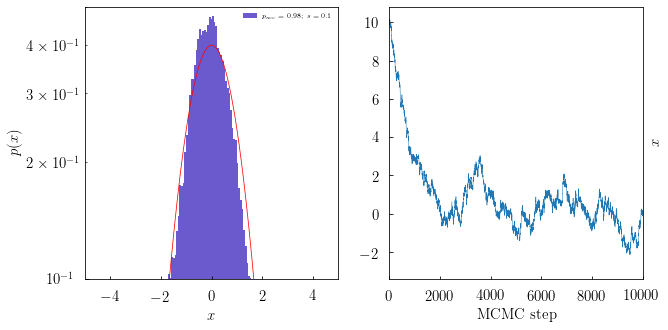

In [39]:
step = 0.1
nsteps = 100000
xchain01, pacc01 = simple_mcmc(nsteps, x0, step, gauss_nd, *args)
print("Finished MCMC chain with %d samples for s = %.2f; acceptance probability is %.3e"%(nsteps, step, pacc01))

plot_1d_pdf_mcmc(xchain01, *args, modelpdf=gauss_nd, iterlim=10000, ylims=[1.e-1,0.5],  pacc=pacc01, step=step, lw=0.75)

In [40]:
from time import time

tstart = time()
step = 10.0
xchain10, pacc10 = simple_mcmc(nsteps, x0, step, gauss_nd, *args)
tend = time()
print("Finished MCMC chain with %d samples for s = %.2f; acceptance probability is %.3e"%(nsteps, step, pacc10))
print("elapsed time = %.3g sec"%(tend-tstart))

Finished MCMC chain with 100000 samples for s = 10.00; acceptance probability is 1.596e-01
elapsed time = 2.66 sec


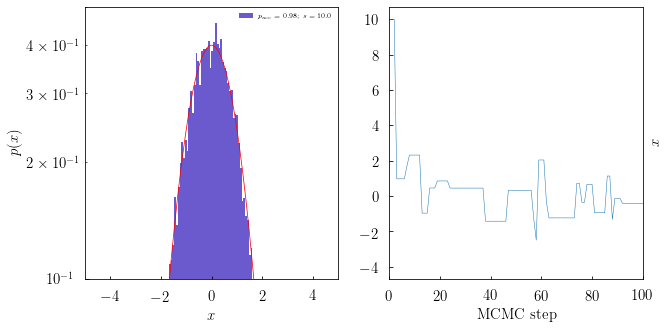

In [41]:
plot_1d_pdf_mcmc(xchain10, *args, modelpdf=gauss_nd, iterlim=100, ylims=[1.e-1,0.5],  pacc=pacc01, step=step, lw=0.75)

### Auto-correlation function

Introduced in the l09 notebook on spectral analysis. Auto-correlation function (ACF) forms a Fourier pair with the power spectrum: i.e., power spectrum is a direct FT of the ACF, while ACF is inverse DFT of the power spectrum. This fact is known as the <a href="https://en.wikipedia.org/wiki/Wiener%E2%80%93Khinchin_theorem">Wiener-Khinchin theorem</a>.

For discrete data evaluated at evenly spaced points it is defined as 

$$ 
\xi(j) = \frac{\sum\limits_{i=0}^{N-j-1}\left[(y_i-\bar{y})(y_{i+j}-\bar{y})\right]}{\sum\limits_{i=0}^{N-1}(y_i-\bar{y})^2}.
$$



In [47]:
def auto_corr_func(timeseries, lagmax):
    """
    compute auto correlation function
    """
    ts = np.asarray(timeseries)
    N = np.size(ts) - 1
    ts -= np.average(ts) # Set to mean 0
    corr_func = np.zeros(lagmax)
    for dt in range(lagmax):
        # sum of ts[t+dt]*ts[t]
        corr_func[dt] = (np.dot(timeseries[0:N-dt],timeseries[dt:N])) 
    if (corr_func[0]>0):
        corr_func /= corr_func[0] # normalize
    return corr_func

def compute_tcorr(timeseries,maxcorr):
    """
    compute correlation time
    """
    timeseries = np.copy(timeseries)
    mean = np.average(timeseries)
    corrfxn = auto_corr_func(timeseries,maxcorr)
    tau = np.sum(corrfxn)-1
    var = np.var(timeseries)
    sigma = np.sqrt(var * tau / len(timeseries))
    return tau, mean, sigma


In [48]:
cf01 = auto_corr_func(xchain01, 5000)
cf1 = auto_corr_func(xchain1, 200)
cf10 = auto_corr_func(xchain10, 100)

In [49]:
tcorr01 = compute_tcorr(xchain01,10000)[0]
tcorr1 = compute_tcorr(xchain1,200)[0]
tcorr10 = compute_tcorr(xchain10,10)[0]

In [50]:
def plot_corr_func3(corr_func01, corr_func1, corr_func10, tcorr01, tcorr1, tcorr10, tlims=[0,100], filename=None):
    fontsize = 15
    tcf01 = np.arange(np.size(corr_func01))
    tcf1 = np.arange(np.size(corr_func1))
    tcf10 = np.arange(np.size(corr_func10))
    
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    ax[0].set_xlim(tlims); ax[0].set_ylim(1.e-3,2.)
    ax[0].set_xlabel(r'$t$'); ax[0].set_ylabel(r'$\vert\xi_{tt}(t)\vert$')
    ax[0].set_yscale('log')
    td = np.linspace(tlims[0], tlims[1], 100)
    cfexp = np.exp(-td/tcorr01)
    ax[0].plot(td, cfexp, '--', lw=2., color='violet', label=r'$e^{-\frac{t}{\tau}};\ \ \tau=%.2e$'%tcorr01)
    ax[0].plot(td, cfexp, '--', lw=1., color='lavender')
    ax[0].plot(tcf01, np.abs(corr_func01), lw=1., color='slateblue', label=r'$s=0.1$')
    ax[0].legend(fontsize=fontsize, loc='lower left', frameon=False)
    
    tlims = [0,50]
    ax[1].set_xlim(tlims); ax[1].set_ylim(1.e-3,2.)
    ax[1].set_xlabel(r'$t$'); #ax[0].set_ylabel(r'$\vert\rho_{xx}(t)\vert$')
    ax[1].set_yscale('log')
    td = np.linspace(tlims[0], tlims[1], 100)
    cfexp = np.exp(-td/tcorr1)
    ax[1].plot(td, cfexp, '--', lw=2., color='violet', label=r'$e^{-\frac{t}{\tau}};\ \ \tau=%.2e$'%tcorr1)
    ax[1].plot(td, cfexp, '--', lw=1., color='lavender')
    ax[1].plot(tcf1, np.abs(corr_func1), lw=1., color='slateblue', label=r'$s=1$')
    ax[1].legend(fontsize=fontsize, loc='lower left', frameon=False)
    
    tlims = [0,20]
    ax[2].set_xlim(tlims); ax[2].set_ylim(1.e-3,2.)
    ax[2].set_xlabel(r'$t$'); #ax[0].set_ylabel(r'$\vert\rho_{xx}(t)\vert$')
    ax[2].set_yscale('log')
    td = np.linspace(tlims[0], tlims[1], 100)
    cfexp = np.exp(-td/tcorr10)
    ax[2].plot(td, cfexp, '--', lw=2., color='violet', label=r'$e^{-\frac{t}{\tau}};\ \ \tau=%.2e$'%tcorr10)
    ax[2].plot(td, cfexp, '--', lw=1., color='lavender')
    ax[2].plot(tcf10, np.abs(corr_func10), lw=1., color='slateblue', label=r'$s=10$')
    ax[2].legend(fontsize=fontsize, loc='lower left', frameon=False)

    if filename is not None:
        plt.savefig('fig/'+filename, bbox_inches='tight')
    plt.show()


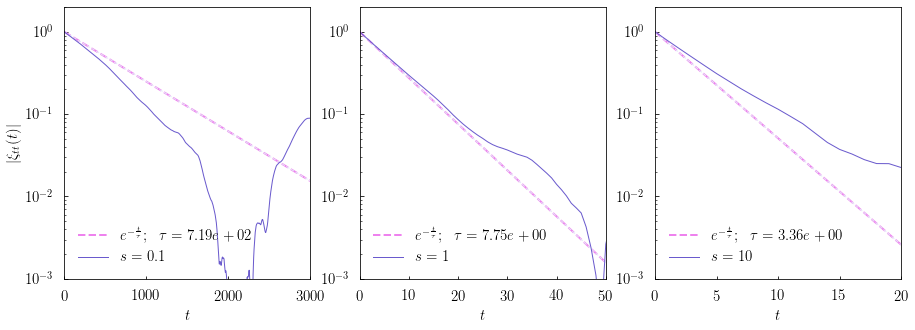

In [51]:
plot_corr_func3(cf01, cf1, cf10, tcorr01, tcorr1, tcorr10, tlims=[0,3000], filename=None)

### The MCMC algorithm seems great. What's the catch?

The algorithm is simple and it works. Why would one want to learn about any other method (like inverse transform and rejection sampling)?


As you may have guessed. There is a catch, or rather a number of catches. These have the following names: "burn-in", "acceptance ratio" and "correlation length", "convergence" and "stopping criteria." 


We will discuss these in turn, but the issue with all of them is that there are no firm criteria and guidelines for dealing with them. Proper application of MCMC requires care, some amount of "black art" (aka experience and intuition). One should also be on the lookout for spurious results.

None of these issues are a show-stopper, however. The method is powerful, albeit often not very efficient, and is the only game in town in many dimensions. 

### Burn-in 

Declaring the first MCMC sample to be a real sample of a distribution, may seem like cheating and it is, in a way. However, there is a price to pay. 

You can declare $x=10$ to be a sample of $e^{-x^2/2}$, but it is a highly improbable sample. This will make some number of subsequent samples derived from it improbable as well. In practice, this necessitates defining a *"burn-in"* sequence of improbable samples and removing it from the final sample of draws. 

Criteria for defining "burn-in sequence" are fuzzy, however. The recommended heuristic rule is to exclude at least the first $20\tau$ steps in the sequence, where $\tau$ is the auto-correlation "time" (or rather step number) defined and illustrated above. This means that for the chain for step size of 0.1$, we would need to remove the first $\approx 16000$ samples. 

### A faster (?), vectorized implementation of the MCMC sampler

The simple implementation above produces a single MCMC chain. However, we can initialize a number of such chains and follow them in parallel, while dealing with a set of chains using numpy vector operations.

A version below implements this idea.

In [33]:
def vectorized_mcmc(x, nsteps=1, step=0.1, modelpdf = None, args = None):
    """
    MCMC sampler implementing a simple Metropolis algorithm
    to follow a number of chains ("walkers") in parallel
    
    This version also can sample distributions of arbitrary number of 
    dimensions ndim
    
    Parameters:
    ------------
    x0 - a real numpy array of size [nwalkers,ndim]
        initial x value
    nsteps - integer
        number of MCMC steps (iterations) to take
    step - float
        step size controlling step proposal distribution
    modelpdf - python function object
        ln(pdf) where pdf is the target pdf to sample
    args - pointer to a list
        list of arguments to pass modelpdf
        
    Returns:
    ---------
    xchain - numpy array of size [nsteps*nwalkers, ndim]
        coordinates of samples in the MCMC chains of size
    pacc   - float
        acceptance ratio of the MCMC steps (ratio of accepted to the total proposed number of steps)
    
    """
    
    # the input array here contains initial values for multiple MCMC sequences
    # or "walkers" in the MCMC jargon (because they "walk" the multi-d space of our target pdf)
    nwalkers = np.shape(x)[0]
    # make sure input is sensible
    assert(nwalkers>0)
    
    # number of dimensions that we will be sampling
    ndim = np.shape(x)[1]
        
    # initialize some auxiliary arrays and variables 
    chain = np.empty_like(x);

    naccept = 0; ntry = 0; nchain = 0
    # initialize arrays that will be used to hold pdf values of samples
    # at old and proposed sample locations
    gxold = np.empty(nwalkers)
    gxtry = np.empty(nwalkers)
    for i in range(nwalkers):
        gxold[i] = modelpdf(x[i,:], *args)
    
    nsample = 0 
    while nsample < nsteps:
        # proposal step using uniform pdf in range [-step, step]
        xtry  = x + step*np.random.uniform(-step, step, np.shape(x)) 
        for i in range(nwalkers):
            gxtry[i] = modelpdf(xtry[i,:], *args) 
        gx = np.copy(gxold) 
        # compare pdf values at the old and proposed sample locations  
        gr   = gxtry - gx
        u = np.random.uniform(0.0,1.0,np.shape(x)[0])
        # accept proposal with probability min[1.0, e^gr]
        iacc = np.where(gr > np.log(u)) 
        # update those "walkers" for which proposal step was accepted 
        x[iacc,:] = xtry[iacc,:]
        gxold[iacc] = gxtry[iacc]
        naccept += np.size(gxtry[iacc])
        # add all walkers to the chain, regardless of whether their proposal step was accepted
        chain = np.vstack((chain, x))

        nsample += 1
        

    return chain, 1.*naccept/(nsample*nwalkers)

In [35]:
from timeit import default_timer

args = [0., 1.]

ndim = 1
nwalkers = 1000
nsteps = 100
step = 1.

# initialize walkers in a uniform random distribution
x0 = np.random.rand(ndim * nwalkers).reshape((nwalkers, ndim))

tstart = default_timer()
xchain1, pacc1 = vectorized_mcmc(x0, nsteps=nsteps, step=step, modelpdf = gauss_nd, args=args)
tend = default_timer()

print("elapsed time = %.3g sec, acceptance ratio=%.3g"%(tend-tstart, pacc1))

elapsed time = 0.252 sec, acceptance ratio=0.806


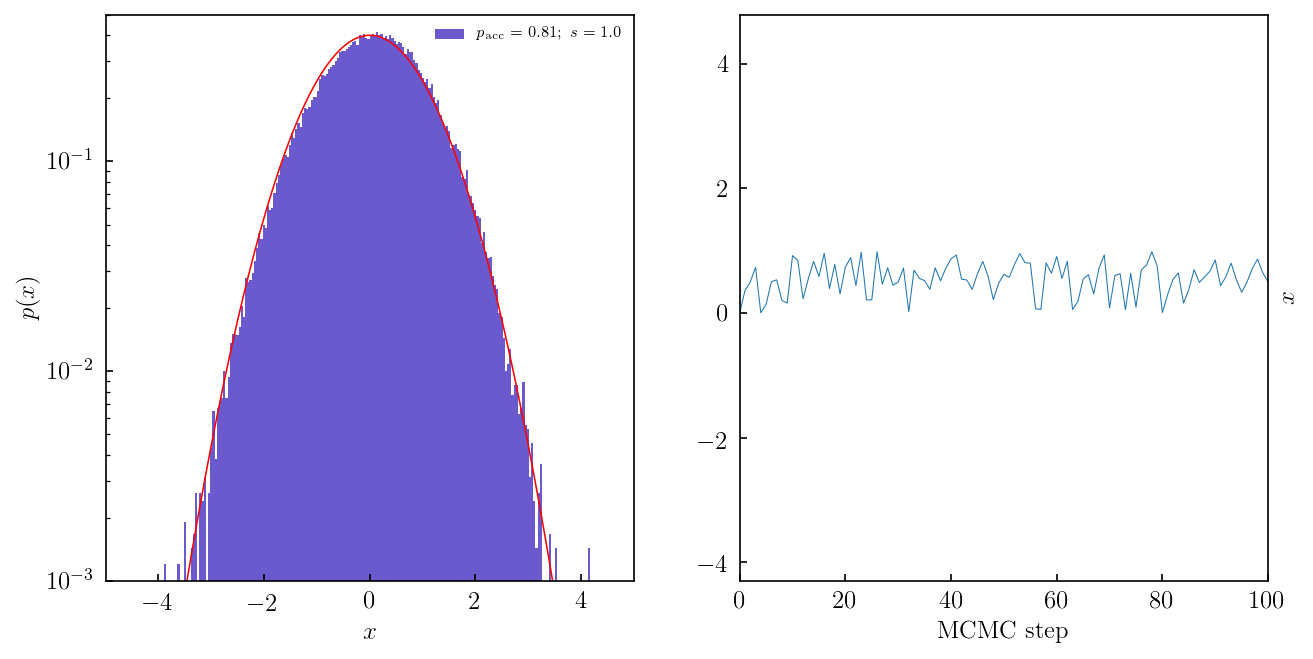

In [36]:
nburn = 1

plot_1d_pdf_mcmc(xchain1[nburn:], *args, iterlim=100, ylims=[1.e-3,0.5], 
                 modelpdf=gauss_nd, pacc=pacc1, step=step, lw=0.75)

### Sampling a 2d Gaussian

Now let's sample a 2-dimensional Gaussian. If the Gaussian is characterized by the mean value in two variables, $\vec{\mu}=[\mu_{x_1},\mu_{x_2}]$, rms values, $\sigma_{x_1}$, $\sigma_{x_2}$ and correlation coefficient, $\rho$. The covariance matrix is: 

$$
\mathbf{\Sigma}=\left(
  \begin{array}{cc}
   \sigma^2_{x_1} & \rho\sigma_{x_1}\sigma_{x_2} \\
     \rho\sigma_{x_1}\sigma_{x_2} & \sigma^2_{x_2}  \\
  \end{array} \right)
$$

Let's specify a Gaussian with zero means, unit variances in the two dimensions and a given correlation coefficient. Try to run this with $\rho=0.95, 0.99, 0.999$ and check how distribution of resulting samples look like and how the acceptance ratio changes with $\rho$. 

In [38]:
s1, s2, r = 1.0, 1.0, 0.95

means = [0., 0.]
cov = [[s1**2, r*s1*s2], [r*s1*s2, s2**2]]

# compute the inverse covariance matrix
icov = np.linalg.inv(cov)

nwalkers = 100
ndim = 2
nsteps = 1000
x0 = np.random.rand(ndim * nwalkers).reshape((nwalkers, ndim))
step = 1.

tstart = default_timer()

xchain1, pacc1 = vectorized_mcmc(x0, nsteps=nsteps, step=step, modelpdf = gauss_nd, args=[means,icov])

tend = default_timer()
print("elapsed time = %.3g sec, acceptance ratio=%.3g"%(tend-tstart, pacc1))

elapsed time = 0.578 sec, acceptance ratio=0.37


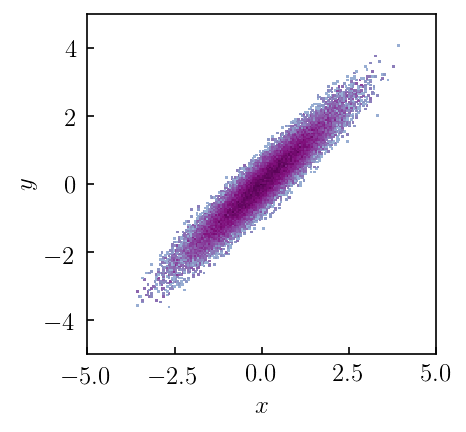

In [42]:
from codes.plot_utils import plot_2d_dist

x1 = xchain1[:,0]; x2 = xchain1[:,1]
plot_2d_dist(x1, x2, xlim=[-5,5], ylim =[-5,5], nxbins=200, nybins=200, 
             clevs=None, xlabel='$x$', ylabel='$y$', figsize=(3,3))

### Comparing to emcee MCMC package

Let's compare our result to the most popular MCMC package in astronomy <a href="http://dfm.io/emcee/current/"><tt>emcee</tt></a>. 

To install it, do

    pip install emcee
    
in the Anaconda command prompt or linux/MacOS shell.

In [44]:
import emcee

ndim, nwalkers, nsteps = 2, 100, 1000

p0 = np.random.rand(ndim * nwalkers).reshape((nwalkers, ndim))

tstart = default_timer()

sampler = emcee.EnsembleSampler(nwalkers, ndim, gauss_nd, args=[means,icov])

echain, prob, state = sampler.run_mcmc(p0, nsteps)

tend = default_timer()

# acceptance fraction averaged over all walkers
eacc = np.mean(sampler.acceptance_fraction)
print("emcee time = %.3g sec, acceptance fraction = %.3g"%(tend-tstart, eacc))

emcee time = 0.588 sec, acceptance fraction = 0.719


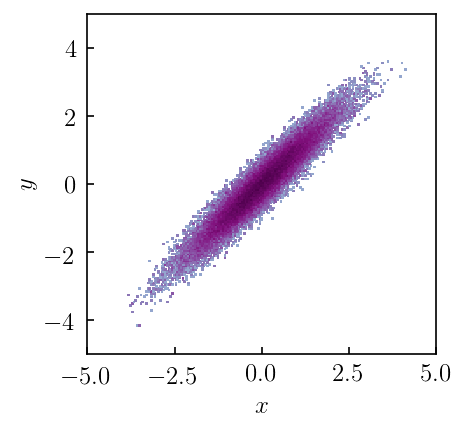

In [46]:
x1 = sampler.flatchain[:,0]; 
x2 = sampler.flatchain[:,1]

plot_2d_dist(x1, x2, xlim=[-5,5], ylim =[-5,5], nxbins=200, nybins=200, 
             clevs=None, xlabel='$x$', ylabel='$y$', figsize=(3,3))

### Sampling a much more difficult distribution

What follows below is a distribution I called "smiley face" (although some find the name "alien face" more appropriate, given how it appears in some renderings): it consists of two 2-d Gaussians and a Rosenbrock "banana" distribution.


In [47]:
def smiley_face_pdf(xin, *args):
    x = xin[0]; y = xin[1]
    fa1, fx1, fy1, fsx1, fsy1, fr1, fa2, fx2, fy2, fsx2, fsy2, fr2 = args
    # Gaussian pdfs 1 and 2
    res  = (np.clip(fa1*np.exp(-0.5/(1 - fr1**2)*( ((x-fx1)/fsx1)**2 +
                    ((y-fy1)/fsy1)**2 + 2*fr1*(x-fx1)*(y-fy1)/(fsx1*fsy1) )),
                    1.e-300, 1.e300))
    res += (np.clip(fa2*np.exp(-0.5/(1 - fr2**2)*( ((x-fx2)/fsx2)**2 +
                    ((y-fy2)/fsy2)**2 + 2*fr2*(x-fx2)*(y-fy2)/(fsx2*fsy2) )),
                    1.e-300, 1.e300))
    # + Rosenbrock pdf
    res += np.clip(np.exp(-(100.*(y-x**2)**2 + (4.0-x)**2)/20.0), 1.e-300, 1.e300)
    return np.log(np.clip(res, 1.e-300, 1.e300))

In [48]:
fa1 = 0.1; fx1 =  4.0; fy1 =  80.0; fsx1 = 0.1; fsy1 = .2; fr1 = -.7
fa2 = 0.1; fx2 =  -4.0; fy2 =  80.0; fsx2 = 0.1; fsy2 = .2; fr2 = .8

args = [fa1, fx1, fy1, fsx1, fsy1, fr1, fa2, fx2, fy2, fsx2, fsy2, fr2]

In [50]:
nwalkers = 100
ndim = 2
nsteps = 1000

#uniformly distributed walkers in ndim with locations from 0 to 1
x0 = np.random.rand(ndim * nwalkers).reshape((nwalkers, ndim))
step = 1.

tstart = default_timer()

xchain1, pacc1 = vectorized_mcmc(x0, nsteps=nsteps, step=step, 
                                 modelpdf = smiley_face_pdf, args=args)

tend = default_timer()
print("elapsed time = %.3g sec, acceptance ratio=%.3g"%(tend-tstart, pacc1))

elapsed time = 1.96 sec, acceptance ratio=0.246


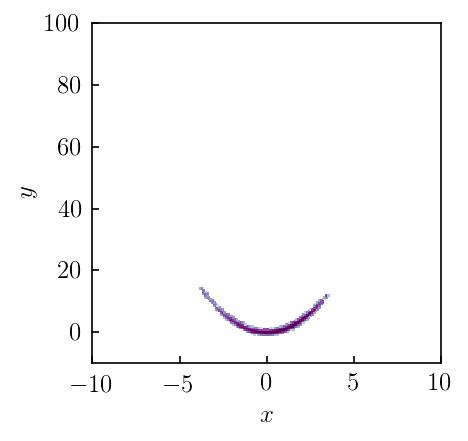

In [52]:
x1 = xchain1[:,0]; x2 = xchain1[:,1]
plot_2d_dist(x1, x2, xlim=[-10,10], ylim =[-10,100], nxbins=200, nybins=200, 
             clevs=None, xlabel='$x$', ylabel='$y$', figsize=(3,3))

Now with emcee

In [54]:
ndim, nwalkers, nsteps = 2, 100, 1000

p0 = np.random.rand(ndim * nwalkers).reshape((nwalkers, ndim))


sampler = emcee.EnsembleSampler(nwalkers, ndim, smiley_face_pdf, args=args)

echain, prob, state = sampler.run_mcmc(p0, nsteps)


# acceptance fraction averaged over all walkers
eacc = np.mean(sampler.acceptance_fraction)
print("emcee time = %.3g sec, acceptance fraction = %.3g"%(tend-tstart, eacc))

emcee time = 1.96 sec, acceptance fraction = 0.348


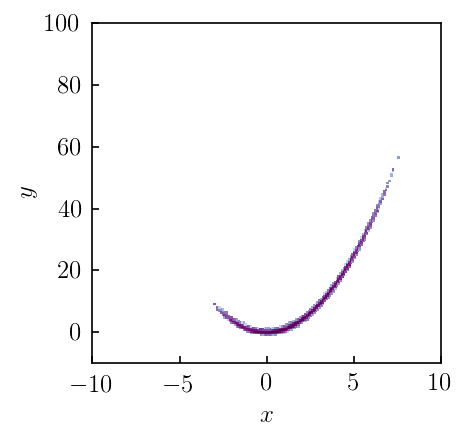

In [56]:
x1 = sampler.flatchain[:,0]; 
x2 = sampler.flatchain[:,1]

plot_2d_dist(x1, x2, xlim=[-10,10], ylim =[-10,100], nxbins=200, nybins=200, 
             clevs=None, xlabel='$x$', ylabel='$y$', figsize=(3,3))

The above looks more like a "smirk" than a smile. This is because the Rosenbrock "banana" pdf is assymetric. We can see that emcee sampled the tail of the distribution much better than our implementation of the Metropolis algorithm and with a much larger acceptance ratio. 

But where are the Gaussian "eyes" in the smiley face? How should this distribution look like?

In [61]:
from matplotlib.colors import LogNorm

def plot_2d_pdf(modelpdf, xlims, ylims, nxbins=200, nybins=200, args=args, figsize=(3,3)):
    xbins = np.linspace(xlims[0], xlims[1], nxbins)
    ybins = np.linspace(ylims[0], ylims[1], nybins)
    X, Y = np.meshgrid(xbins,ybins) 

    smf = modelpdf([X,Y], *args)

    fig, ax = plt.subplots(figsize=figsize)
    plt.xlabel('$x$'); plt.ylabel('$y$')
    plt.xlim(xlims); plt.ylim(ylims)

    pcol = ax.pcolormesh(X, Y, np.exp(smf), cmap='Blues', norm = LogNorm(), linewidth=0., rasterized=True)

    plt.show()
    

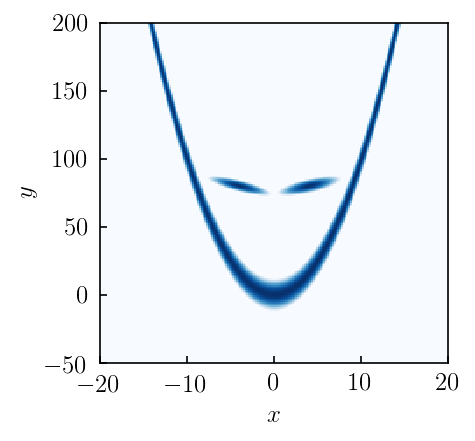

In [62]:
nxbins, nybins = 200, 200;
xlims = [-20, 20]; ylims = [-50, 200]

plot_2d_pdf(smiley_face_pdf, xlims, ylims, nxbins=nybins, nybins=nxbins, args=args, figsize=(3,3))

Let's try again with a more widspread initial distribution of walkers and 10 times larger number of walkers.

In [64]:
nwalkers = 1000

p0 = 100.*np.random.rand(ndim * nwalkers).reshape((nwalkers, ndim))

sampler = emcee.EnsembleSampler(nwalkers, ndim, smiley_face_pdf, args=args)

echain, prob, state = sampler.run_mcmc(p0, nsteps)

# acceptance fraction averaged over all walkers
eacc = np.mean(sampler.acceptance_fraction)
print("emcee time = %.3g sec, acceptance fraction = %.3g"%(tend-tstart, eacc))

C:\Users\h2_sf\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in double_scalars
  if sys.path[0] == '':


emcee time = 1.96 sec, acceptance fraction = 0.79


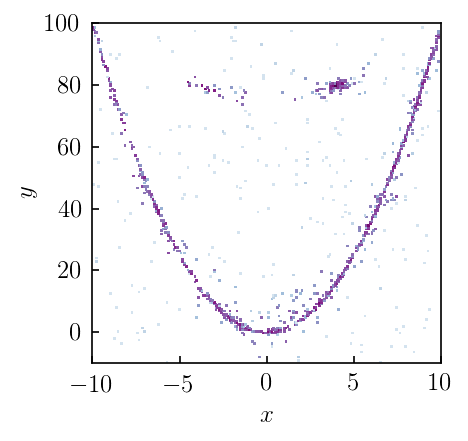

In [66]:
x1 = sampler.flatchain[:,0]; 
x2 = sampler.flatchain[:,1]

plot_2d_dist(x1, x2, xlim=[-10,10], ylim =[-10,100], nxbins=200, nybins=200, 
             clevs=None, xlabel='$x$', ylabel='$y$', figsize=(3,3))

This looks much better, but is still quite far from the fully sampled distribution shown above. So how do we know how many walkers and how many steps to use in order to get fully sampled (converged) distribution? 

In [ ]:
def vectorized_mcmc(x, nsteps=1, step=0.1, modelpdf = None, args = None):
    """
    MCMC sampler implementing a simple Metropolis algorithm
    to follow a number of chains ("walkers") in parallel
    
    This version also can sample distributions of arbitrary number of 
    dimensions ndim
    
    Parameters:
    ------------
    x0 - a real numpy array of size [nwalkers,ndim]
        initial x value
    nsteps - integer
        number of MCMC steps (iterations) to take
    step - float
        step size controlling step proposal distribution
    modelpdf - python function object
        ln(pdf) where pdf is the target pdf to sample
    args - pointer to a list
        list of arguments to pass modelpdf
        
    Returns:
    ---------
    xchain - numpy array of size [nsteps*nwalkers, ndim]
        coordinates of samples in the MCMC chains of size
    pacc   - float
        acceptance ratio of the MCMC steps (ratio of accepted to the total proposed number of steps)
    
    """
    
    # the input array here contains initial values for multiple MCMC sequences
    # or "walkers" in the MCMC jargon (because they "walk" the multi-d space of our target pdf)
    nwalkers = np.shape(x)[0]
    # make sure input is sensible
    assert(nwalkers>0)
    
    # number of dimensions that we will be sampling
    ndim = np.shape(x)[1]
        
    # initialize some auxiliary arrays and variables 
    chain = np.empty_like(x);

    naccept = 0; ntry = 0; nchain = 0
    # initialize arrays that will be used to hold pdf values of samples
    # at old and proposed sample locations
    gxold = np.empty(nwalkers)
    gxtry = np.empty(nwalkers)
    for i in range(nwalkers):
        gxold[i] = modelpdf(x[i,:], *args)
    
    nsample = 0 
    while nsample < nsteps:
        # proposal step using uniform pdf in range [-step, step]
        xtry  = x + step*np.random.uniform(-step, step, np.shape(x)) 
        for i in range(nwalkers):
            gxtry[i] = modelpdf(xtry[i,:], *args) 
        gx = np.copy(gxold) 
        # compare pdf values at the old and proposed sample locations  
        gr   = gxtry - gx
        u = np.random.uniform(0.0,1.0,np.shape(x)[0])
        # accept proposal with probability min[1.0, e^gr]
        iacc = np.where(gr > np.log(u)) 
        # update those "walkers" for which proposal step was accepted 
        x[iacc,:] = xtry[iacc,:]
        gxold[iacc] = gxtry[iacc]
        naccept += np.size(gxtry[iacc])
        # add all walkers to the chain, regardless of whether their proposal step was accepted
        chain = np.vstack((chain, x))

        nsample += 1
        

    return chain, 1.*naccept/(nsample*nwalkers)

### MCMC convergence

The answer to this question is also "fuzzy" in the MCMC applications, but there are several heuristic *convergence criteria* that are used. That is, chains are increased not for a fixed number of steps, but until a set of convergence criteria are satisfied.

Before we look into that, let's talk about how emcee achieves its better results compared to our implementation. We can gain an insight about why acceptance ratio in the Metropolis MCMC in the cases of very correlated 2d Gaussian distribution or "smiley face" distribution from the following illustrative <a href="http://chi-feng.github.io/mcmc-demo/">visualization of the methods at work</a>.

### Affine-invariant sampler of Goodman & Weare (2010)

<a href="http://msp.org/camcos/2010/5-1/p04.xhtml">Goodman & Weare (2010)</a> have developed a simple MCMC sampling algorithm, which is efficient for distributions that exhibit strong degeneracies (narrow ridges in the pdf), such as the Rosenbrock density pdf discussed above, or pdfs with multiple peaks. 

In this method, one initializes a number of walkers distributed with a multi-variate Gaussian probability around a starting point. Then MCMC chain is constructed in a way similar to the Metropolis algorithm: proposing a step, estimating probability at the proposed location, and then accepting the step with an acceptance probability. The difference from Metropolis is in the way the step is proposed and how acceptance probability is calculated:

* In this method a step from location $\vec{x}_i$ to $\vec{x}_{i+1}$ is proposed as a *stretch* move: $\vec{x}_{i}^{\prime}=\vec{x}_{j}+z_r(\vec{x}_{i}-\vec{x}_j)$, where $\vec{x}_{j}$ is the current location of *another* randomly chosen walker (but not the current one we are updating) and $z_r$ is  a random number drawn from the pdf $g(z)= 1/\sqrt{z}$ for $z\in[1/a,a]$ interval and $g(z)=0$ outside this interval, where GW10 suggest $a=2$. 


* The proposed stretch move is then accepted with probability $p_{\rm acc}={\rm min}[1.0,z_r^{D-1}\pi(\vec{x}_i^{\prime})/\pi(\vec{x})]$, where $\pi$ is the target pdf the chain is supposed to sample and $D$ is the number of components of $\vec{x}$ (i.e., the number of dimensions of the pdf we are sampling; e.g., for the $D=2$ for a 2D Gaussian).  

### Why does GW10 sampling algorithm improve Metropolis MCMC?

discuss

### Recommended reading

* S 3.1-3.8 and S 2 of the <a href="http://adsabs.harvard.edu/abs/2017ARA%26A..55..213S">ARA&A review</a> by Sanjib Sharma on MCMC methods for Bayesian data analysis in astronomy.

* Illustrative <a href="http://chi-feng.github.io/mcmc-demo/">visualizations of MCMC methods at work</a>.